# Four Factors Prediction Models

Four Factors are the box score derived metrics that correlate most closely with winning basketball games. These factors also identify a team’s strategic strengths and weaknesses. These can be calculated for the winning and loosing teams.

1) Team’s Own Effective Field Goal Percentage
    1) Effective Field Goal Percentage measures the shooting factor is measured using
    2) Effective Field Goal Percentage = (Field Goals Made) + (0.5 * 3-Pointer Field Goals Made) / (Field Goal Attempts)
    3) Winning Team: WFGM + (0.5 * WFGM3) / WFGA
    4) Losing Team: LFGM + (0.5 * LFGM3) / LFGA
2) Team’s Own Turnover Percentage
    1) Turnover Percentage is the percentage of a team’s or possessions that end in a turnover. Calculating the number of turnovers a player will make in 100 possessions makes itself ‘tempo-free’
    2) Turnover Percentage = Turnovers / (Field Goal Attempts + (0.44 * Free Throw Attempts) + Turnovers)
    3) Winning Team: WTO / (WFGA + (0.44 * WFTA) + WTO)
    4) Losing Team: LTO / (LFGA + (0.44 * LFTA) + LTO)
3) Team’s Own Offensive Rebound Percentage
    1) Offensive rebound percentage is an estimate of the percentage of available offensive rebounds a team grabbed.
    2) Offensive Rebounding Percentage = (Offensive Rebounds) / (Offensive Rebounds + Opponent’s Defensive Rebounds)
    3) Winning Team: WOR / WOR + LDR
    4) Losing Team: LOR / LOR + WDR
4) Team’s Own Free Throw Rate
    1) The free throw factor is a measure of both how often a team gets to the line and how often they make them.
    2)Free Throw Rate = Free Throws Made / Field Goals Attempted
    3) Winning Team: WFTM / WFGA
    4) Losing Team: LFTM / LFGA
    
While these are the four essential factors that decide to win and to lose in the NBA, the factors do not carry equal weight. Dean Oliver (American statistician and assistant coach for the NBA's Washington Wizards) placed a certain set of weights on each of the four categories to ascertain value of each factor in regards to a win. 

1. Shooting (40%)
2. Turnovers (25%)
3. Rebounding (20%)
4. Free Throws (15%)

- https://www.nbastuffer.com/analytics101/four-factors/
- https://www.basketball-reference.com/about/factors.html
- https://squared2020.com/2017/09/05/introduction-to-olivers-four-factors/

In [2]:
import pandas as pd
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import matplotlib.pyplot as plt

# Four Factors Model Using ALL Regular Season Data to Place Bets on NCAA Tourney Data

## Loading Data

In [2]:
# Load Tournament results and filter to year > 2008 (oldest moneyline data)
box_scores_df = pd.read_csv("../data//Kaggle-Data/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv")
box_scores_df = box_scores_df[box_scores_df['Season'] >= 2008]

moneyline_df = pd.read_csv("../data/Pre-Processed-Data/CleanedMoneylineData.csv",index_col=0)

In [3]:
box_scores_df = box_scores_df[["Season", "DayNum", "WTeamID", "LTeamID", "WFGM", "WFGA", "WFGM3", "WFTM", "WFTA", "WOR", "WDR", "WTO", "LFGM", "LFGA", "LFGM3", "LFTM", "LFTA", "LOR", "LDR", "LTO"]]

In [4]:
winner_moneylines = pd.merge(box_scores_df, moneyline_df, how='left', 
                             left_on=['Season','DayNum','WTeamID'], 
                             right_on = ['Season','DayNum','TeamID'])[["Season", "DayNum", "WTeamID", "LTeamID","Moneyline", "WFGM", "WFGA", "WFGM3", "WFTM", "WFTA", "WOR", "WDR", "WTO", "LFGM", "LFGA", "LFGM3", "LFTM", "LFTA", "LOR", "LDR", "LTO"]]

winner_moneylines.rename(columns = {"Moneyline": "WMoneyline"}, inplace = True)

In [5]:
regular_moneyline_df = pd.merge(winner_moneylines, moneyline_df, how='left', 
                             left_on=['Season','DayNum','LTeamID'], 
                             right_on = ['Season','DayNum','TeamID'])[["Season", "DayNum", "WTeamID", "LTeamID","WMoneyline","Moneyline", "WFGM", "WFGA", "WFGM3", "WFTM", "WFTA", "WOR", "WDR", "WTO", "LFGM", "LFGA", "LFGM3", "LFTM", "LFTA", "LOR", "LDR", "LTO"]]

regular_moneyline_df.rename(columns = {"Moneyline": "LMoneyline"}, inplace = True)

regular_moneyline_df.head()

,Season,DayNum,WTeamID,LTeamID,WMoneyline,LMoneyline,WFGM,WFGA,WFGM3,WFTM,...,WDR,WTO,LFGM,LFGA,LFGM3,LFTM,LFTA,LOR,LDR,LTO
0,2008,0,1272,1404,-39000.0,13000.0,37,83,11,17,...,37,10,24,77,10,13,22,20,27,19
1,2008,0,1350,1263,-240.0,200.0,17,51,4,6,...,14,18,19,45,1,3,5,12,28,29
2,2008,1,1205,1105,-160.0,140.0,21,59,5,22,...,22,21,17,49,4,17,26,12,23,27
3,2008,1,1246,1146,-7000.0,3000.0,26,55,4,11,...,26,16,10,50,3,17,21,15,14,18
4,2008,1,1272,1350,-10000.0,4000.0,25,51,9,21,...,25,18,24,63,8,7,12,15,19,21


In [6]:
regular_moneyline_df.isna().sum()

Season            0
DayNum            0
WTeamID           0
LTeamID           0
WMoneyline    19490
LMoneyline    19517
WFGM              0
WFGA              0
WFGM3             0
WFTM              0
WFTA              0
WOR               0
WDR               0
WTO               0
LFGM              0
LFGA              0
LFGM3             0
LFTM              0
LFTA              0
LOR               0
LDR               0
LTO               0
dtype: int64

In [7]:
# For now, drop NAs
regular_moneyline_df = regular_moneyline_df.dropna()

In [8]:
teams_df = pd.read_csv("../data//Kaggle-Data/MDataFiles_Stage1/MTeams.csv")

In [9]:
teams_df = teams_df.drop(["FirstD1Season","LastD1Season"], axis=1)

In [10]:
box_scores_tourney = pd.read_csv("../data//Kaggle-Data/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv")
box_scores_tourney = box_scores_tourney[box_scores_tourney['Season'] >= 2008]
box_scores_tourney = box_scores_tourney[["Season", "DayNum", "WTeamID", "LTeamID"]]

winner_moneylines_tourney = pd.merge(box_scores_tourney, moneyline_df, how='left', 
                             left_on=['Season','DayNum','WTeamID'], 
                             right_on = ['Season','DayNum','TeamID'])[["Season", "DayNum", "WTeamID", "LTeamID","Moneyline",]]

winner_moneylines_tourney.rename(columns = {"Moneyline": "WMoneyline"}, inplace = True)

tourney_df = pd.merge(winner_moneylines_tourney, moneyline_df, how='left', 
                             left_on=['Season','DayNum','LTeamID'], 
                             right_on = ['Season','DayNum','TeamID'])[["Season", "DayNum", "WTeamID", "LTeamID","WMoneyline","Moneyline"]]

tourney_df.rename(columns = {"Moneyline": "LMoneyline"}, inplace = True)

tourney_df.head()

,Season,DayNum,WTeamID,LTeamID,WMoneyline,LMoneyline
0,2008,134,1291,1164,-375.0,315.0
1,2008,136,1181,1125,-4500.0,2250.0
2,2008,136,1242,1340,-5000.0,2500.0
3,2008,136,1243,1425,140.0,-160.0
4,2008,136,1266,1246,-275.0,235.0


## Compute the factors/attributes for each Regular Season Game

In [11]:
# Effective Field Goal Percentage
# Winning Team: WFGM + (0.5 * WFGM3) / WFGA
regular_moneyline_df['WEFGP'] = regular_moneyline_df.apply(lambda row: (row.WFGM + (0.5 * row.WFGM3))/(row.WFGA), axis=1)
# Losing Team: LFGM + (0.5 * LFGM3) / LFGA
regular_moneyline_df['LEFGP'] = regular_moneyline_df.apply(lambda row: (row.LFGM + (0.5 * row.LFGM3))/(row.LFGA), axis=1)

#Turnover Percentage
# Winning Team: WTO / (WFGA + (0.44 * WFTA) + WTO)
regular_moneyline_df['WTP'] = regular_moneyline_df.apply(lambda row: (row.WTO)/(row.WFGA + (0.44 * row.WFTA) + row.WTO), axis=1)
# Losing Team: LTO / (LFGA + (0.44 * LFTA) + LTO)
regular_moneyline_df['LTP'] = regular_moneyline_df.apply(lambda row: (row.LTO)/(row.LFGA + (0.44 * row.LFTA) + row.LTO), axis=1)

# Offensive Rebound Percentage
# Winning Team: WOR / WOR + LDR
regular_moneyline_df['WORP'] = regular_moneyline_df.apply(lambda row: (row.WOR)/(row.WOR + row.LDR), axis=1)
#Losing Team: LOR / LOR + WDR
regular_moneyline_df['LORP'] = regular_moneyline_df.apply(lambda row: (row.LOR)/(row.LOR + row.WDR), axis=1)

#Winning Team Defensive Rebound: WDR / (LOR + WDR)
#regular_moneyline_df['WDRP'] = regular_moneyline_df.apply(lambda row: (row.WDR)/(row.LOR + row.WDR), axis=1)
#Losing Team Defensive Rebound: LDR / (WOR + LDR)
#regular_moneyline_df['LDRP'] = regular_moneyline_df.apply(lambda row: (row.LDR)/(row.WOR + row.LDR), axis=1)

# Free Throw Rate
# Winning Team: WFTM / WFGA
regular_moneyline_df['WFTR'] = regular_moneyline_df.apply(lambda row: (row.WFTM)/(row.WFGA), axis=1)
# Losing Team: LFTM / LFGA
regular_moneyline_df['LFTR'] = regular_moneyline_df.apply(lambda row: (row.LFTM)/(row.LFGA), axis=1)

In [12]:
factors_regular_moneyline_df = regular_moneyline_df.drop(["WFGM", "WFGA", "WFGM3", "WFTM", "WFTA", "WOR", "WDR", "WTO", "LFGM", "LFGA", "LFGM3", "LFTM", "LFTA", "LOR", "LDR", "LTO"], axis=1)

In [13]:
factors_regular_moneyline_df.head()

,Season,DayNum,WTeamID,LTeamID,WMoneyline,LMoneyline,WEFGP,LEFGP,WTP,LTP,WORP,LORP,WFTR,LFTR
0,2008,0,1272,1404,-39000.0,13000.0,0.512048,0.376623,0.094554,0.179788,0.437500,0.350877,0.204819,0.168831
1,2008,0,1350,1263,-240.0,200.0,0.372549,0.433333,0.249723,0.380577,0.200000,0.461538,0.117647,0.066667
2,2008,1,1205,1105,-160.0,140.0,0.398305,0.387755,0.223214,0.308783,0.465116,0.352941,0.372881,0.346939
3,2008,1,1246,1146,-7000.0,3000.0,0.509091,0.230000,0.205023,0.233040,0.562500,0.365854,0.200000,0.340000
4,2008,1,1272,1350,-10000.0,4000.0,0.578431,0.444444,0.216659,0.235215,0.387097,0.375000,0.411765,0.111111


## Data Visualization For Regular Season Games

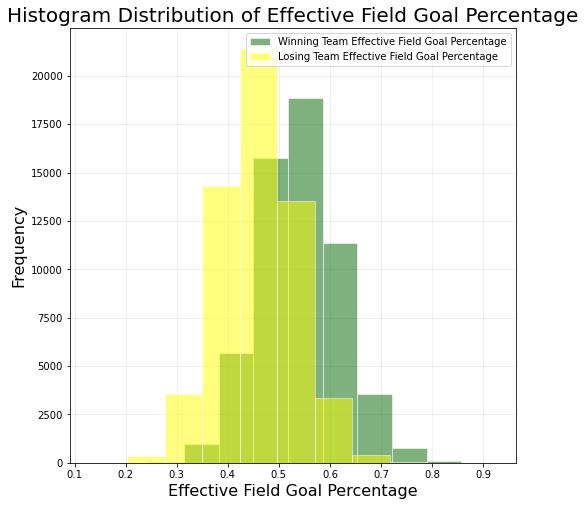

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
factors_regular_moneyline_df.hist(column='WEFGP', ax=ax,facecolor="darkgreen", alpha = 0.5, edgecolor="white", label = "Winning Team Effective Field Goal Percentage")
factors_regular_moneyline_df.hist(column='LEFGP', ax=ax,facecolor="yellow", alpha = 0.5, edgecolor="white", label = "Losing Team Effective Field Goal Percentage")

# Add titles and labels 
ax.set_title("Histogram Distribution of Effective Field Goal Percentage", fontsize=20)
ax.set_xlabel("Effective Field Goal Percentage", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

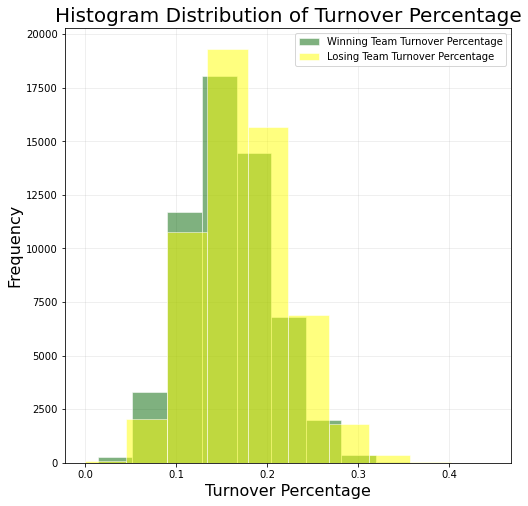

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
factors_regular_moneyline_df.hist(column='WTP', ax=ax,facecolor="darkgreen", alpha = 0.5, edgecolor="white", label = "Winning Team Turnover Percentage")
factors_regular_moneyline_df.hist(column='LTP', ax=ax,facecolor="yellow", alpha = 0.5, edgecolor="white", label = "Losing Team Turnover Percentage")

# Add titles and labels 
ax.set_title("Histogram Distribution of Turnover Percentage", fontsize=20)
ax.set_xlabel("Turnover Percentage", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

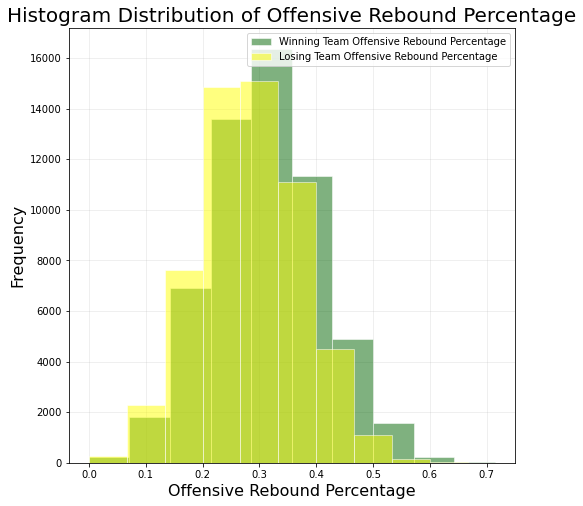

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
factors_regular_moneyline_df.hist(column='WORP', ax=ax,facecolor="darkgreen", alpha = 0.5, edgecolor="white", label = "Winning Team Offensive Rebound Percentage")
factors_regular_moneyline_df.hist(column='LORP', ax=ax,facecolor="yellow", alpha = 0.5, edgecolor="white", label = "Losing Team Offensive Rebound Percentage")

# Add titles and labels 
ax.set_title("Histogram Distribution of Offensive Rebound Percentage", fontsize=20)
ax.set_xlabel("Offensive Rebound Percentage", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

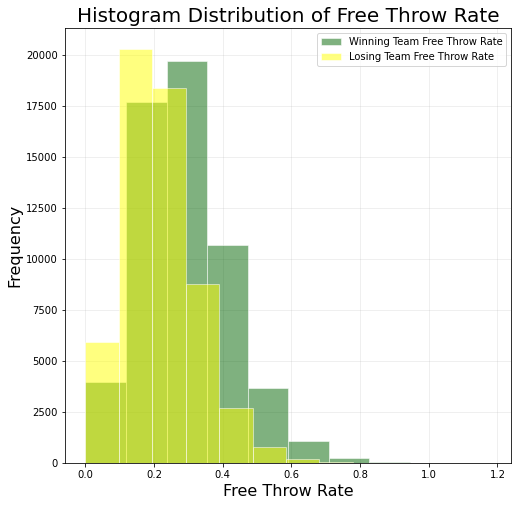

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
factors_regular_moneyline_df.hist(column='WFTR', ax=ax,facecolor="darkgreen", alpha = 0.5, edgecolor="white", label = "Winning Team Free Throw Rate")
factors_regular_moneyline_df.hist(column='LFTR', ax=ax,facecolor="yellow", alpha = 0.5, edgecolor="white", label = "Losing Team Free Throw Rate")

# Add titles and labels 
ax.set_title("Histogram Distribution of Free Throw Rate", fontsize=20)
ax.set_xlabel("Free Throw Rate", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

## Computing team 4-factor averages for each team during the regular season

In [18]:
regular_4F_avg = factors_regular_moneyline_df.drop(["WEFGP", "LEFGP", "WTP", "LTP", "WORP", "LORP", "WFTR", "LFTR", "WMoneyline", "LMoneyline"], axis=1)

In [19]:
regular_4F_avg['W4_Score'] = factors_regular_moneyline_df.apply(lambda row: (0.4 * row.WEFGP) - (0.25 * row.WTP) + (0.2 * row.WORP) + (0.15 * row.WFTR), axis=1)

In [20]:
regular_4F_avg['L4_Score'] = factors_regular_moneyline_df.apply(lambda row: (0.4 * row.LEFGP) - (0.25 * row.LTP) + (0.2 * row.LORP) + (0.15 * row.LFTR), axis=1)

In [21]:
regular_4F_avg.head()

,Season,DayNum,WTeamID,LTeamID,W4_Score,L4_Score
0,2008,0,1272,1404,0.299404,0.201202
1,2008,0,1350,1263,0.144236,0.180497
2,2008,1,1205,1105,0.252474,0.200535
3,2008,1,1246,1146,0.294881,0.157911
4,2008,1,1272,1350,0.316392,0.210641


In [22]:
teams_df["4Factor_Score"] = 0

In [23]:
for idx, row in teams_df.iterrows():
    new_df = regular_4F_avg.loc[(regular_4F_avg['WTeamID'] == row["TeamID"]) | (regular_4F_avg['LTeamID'] == row["TeamID"])]
    list1 = new_df['W4_Score'].values.tolist()
    list2 = new_df['L4_Score'].values.tolist()
    list3 = list1 + list2
    avg = np.nanmean(list3)
    teams_df.at[idx, '4Factor_Score'] = avg

/tmp/ipykernel_728/514679800.py:6: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(list3)


In [24]:
teams_df.head(10)

,TeamID,TeamName,4Factor_Score
0,1101,Abilene Chr,0.252009
1,1102,Air Force,0.254044
2,1103,Akron,0.254680
3,1104,Alabama,0.255337
4,1105,Alabama A&M,0.236108
5,1106,Alabama St,0.246527
6,1107,SUNY Albany,0.242054
7,1108,Alcorn St,0.248145
8,1109,Alliant Intl,NaN
9,1110,American Univ,0.250238


In [25]:
print(teams_df['4Factor_Score'].isna().sum())
print(teams_df['4Factor_Score'].max())
print(teams_df['4Factor_Score'].min())
print("Range: ", teams_df['4Factor_Score'].max() - teams_df['4Factor_Score'].min())

12
0.2858329013659896
0.2361084276027426
Range:  0.04972447376324701


## Compute the team matchup 4 Factor score differences for the NCAA March Madness Season Games

In [26]:
tourney_df.head(10)

,Season,DayNum,WTeamID,LTeamID,WMoneyline,LMoneyline
0,2008,134,1291,1164,-375.0,315.0
1,2008,136,1181,1125,-4500.0,2250.0
2,2008,136,1242,1340,-5000.0,2500.0
3,2008,136,1243,1425,140.0,-160.0
4,2008,136,1266,1246,-275.0,235.0
5,2008,136,1277,1396,-300.0,250.0
6,2008,136,1323,1206,-300.0,250.0
7,2008,136,1338,1331,-415.0,345.0
8,2008,136,1345,1124,-145.0,125.0
9,2008,136,1390,1165,-3000.0,1500.0


difference = wteamid 4 factor score - lteamid 4 factor score

In [27]:
tourney_df['Difference*100'] = 0

In [28]:
for idx, row in tourney_df.iterrows():
    wrow = teams_df.loc[(teams_df['TeamID'] == row["WTeamID"])]
    lrow = teams_df.loc[(teams_df['TeamID'] == row["LTeamID"])]
    wscore = wrow["4Factor_Score"] * 100
    wscore = wscore.tolist()
    lscore = lrow["4Factor_Score"] * 100
    lscore = lscore.tolist()
    diff = wscore[0] - lscore[0]
    tourney_df.at[idx, 'Difference*100'] = diff

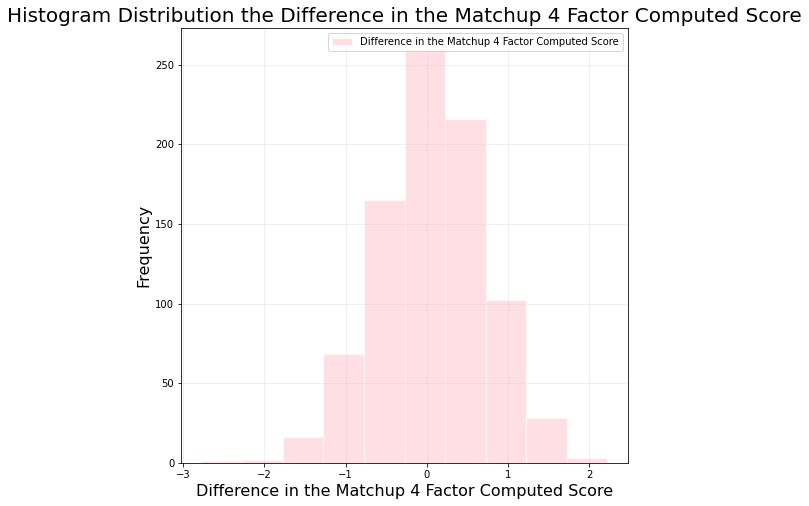

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
tourney_df.hist(column='Difference*100', ax=ax,facecolor="pink", alpha = 0.5, edgecolor="white", label = "Difference in the Matchup 4 Factor Computed Score")


# Add titles and labels 
ax.set_title("Histogram Distribution the Difference in the Matchup 4 Factor Computed Score", fontsize=20)
ax.set_xlabel("Difference in the Matchup 4 Factor Computed Score", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

## Placing Bets, Testing the Model on NCAA March Madness

In [30]:
tourney_df = tourney_df.rename(columns={'WTeamID': 'A'})
tourney_df = tourney_df.rename(columns={'LTeamID': 'B'})
tourney_df = tourney_df.rename(columns={'WMoneyline': 'AMoneyline'})
tourney_df = tourney_df.rename(columns={'LMoneyline': 'BMoneyline'})

In [31]:
tourney_df.head()

,Season,DayNum,A,B,AMoneyline,BMoneyline,Difference*100
0,2008,134,1291,1164,-375.0,315.0,0.354588
1,2008,136,1181,1125,-4500.0,2250.0,0.297255
2,2008,136,1242,1340,-5000.0,2500.0,-0.882730
3,2008,136,1243,1425,140.0,-160.0,0.903147
4,2008,136,1266,1246,-275.0,235.0,0.089568


In [32]:
def calc_net_payout(moneyline, amount_bet = 1):
    if moneyline < 0:
        return -amount_bet*(100/moneyline)
    else:
        return amount_bet*(moneyline/100)

In [33]:
tourney_df['Difference*100'].describe().loc[['min', '25%', '50%', '75%', 'max', 'mean']]

min    -2.773357
25%    -0.368774
50%     0.097220
75%     0.475145
max     2.225652
mean    0.068711
Name: Difference*100, dtype: float64

In [34]:
def bet_difference(df, lower_bound, upper_bound):
    initial_investment = len(df.index) # 1 unit for every game
    running_balance = initial_investment
    bet_count = 0
    lost_count = 0
    won_count = 0
    no_bet_count = 0
    for idx, row in df.iterrows():
        if(row["Difference*100"] >= upper_bound): #make a bet
            bet_count +=1
            if(row["Difference*100"] >= 0): #bet team A
                running_balance += calc_net_payout(row["AMoneyline"])
                won_count +=1
                # print("U bet A")
            else: #bet team B
                running_balance -= 1
                lost_count += 1
                # print("U bet B")
        elif(row["Difference*100"] < lower_bound): #make a bet
            bet_count +=1
            if(row["Difference*100"] >= 0 ): #bet team A
                running_balance += calc_net_payout(row["AMoneyline"])
                won_count +=1
                # print("L bet A")
            else: # bet team B
                running_balance -= 1
                lost_count += 1
                # print("L bet B")
        else: # did not make bet
            running_balance = running_balance
            no_bet_count += 1 

    bet_difference_ROI = (running_balance - initial_investment)/initial_investment 
    
    return bet_difference_ROI, bet_count, won_count, lost_count, no_bet_count

### Strategy 1: Leveraging the 5-Number Summary to make bets, do not bet within the IQR

In [35]:
list_of_years1 = np.unique(tourney_df["Season"])
difference_tracker_strategy1  = []
accuracy_win_bet_strategy1 = []
inaccuracy_lost_bet_strategy1  = []

for year in list_of_years1:
    year_df1 = tourney_df[tourney_df["Season"] == year]
    model1 = bet_difference(year_df1, -0.368774, 0.475145)
    difference_tracker_strategy1.append(model1[0])
    if(model1[1]>0):
        accuracy_win_bet_strategy1.append(model1[2]/model1[1])
        inaccuracy_lost_bet_strategy1.append(model1[3]/model1[1])
    else:
        accuracy_win_bet_strategy1.append(0)
        inaccuracy_lost_bet_strategy1.append(0)

### Strategy 2: A bet must be placed leveraging the median as the split

In [36]:
list_of_years2 = np.unique(tourney_df["Season"])
difference_tracker_strategy2  = []
accuracy_win_bet_strategy2 = []
inaccuracy_lost_bet_strategy2  = []

for year in list_of_years2:
    year_df2 = tourney_df[tourney_df["Season"] == year]
    model2 = bet_difference(year_df2, 0.097220, 0.097220)
    difference_tracker_strategy2.append(model2[0])
    if(model2[1]>0):
        accuracy_win_bet_strategy2.append(model2[2]/model2[1])
        inaccuracy_lost_bet_strategy2.append(model2[3]/model2[1])
    else:
        accuracy_win_bet_strategy2.append(0)
        inaccuracy_lost_bet_strategy2.append(0)

### Strategy 3: Bet when the difference is greater than the 50th percentile of differences and less than the 25th percentile of differences. no bets in the middle 25th to 50th percentile

In [37]:
list_of_years3 = np.unique(tourney_df["Season"])
difference_tracker_strategy3  = []
accuracy_win_bet_strategy3 = []
inaccuracy_lost_bet_strategy3  = []

for year in list_of_years3:
    year_df3 = tourney_df[tourney_df["Season"] == year]
    model3 = bet_difference(year_df3,  -0.368774, 0.097220)
    difference_tracker_strategy3.append(model3[0])
    if(model3[1]>0):
        accuracy_win_bet_strategy3.append(model3[2]/model3[1])
        inaccuracy_lost_bet_strategy3.append(model3[3]/model3[1])
    else:
        accuracy_win_bet_strategy3.append(0)
        inaccuracy_lost_bet_strategy3.append(0)

### Strategy 4: A bet must be placed leveraging the 25th percentile difference as the split

In [38]:
list_of_years4 = np.unique(tourney_df["Season"])
difference_tracker_strategy4  = []
accuracy_win_bet_strategy4 = []
inaccuracy_lost_bet_strategy4  = []

for year in list_of_years4:
    year_df4 = tourney_df[tourney_df["Season"] == year]
    model4 = bet_difference(year_df4, -0.368774, -0.368774)
    difference_tracker_strategy4.append(model4[0])
    if(model4[1]>0):
        accuracy_win_bet_strategy4 .append(model4[2]/model4[1])
        inaccuracy_lost_bet_strategy4.append(model4[3]/model4[1])
    else:
        accuracy_win_bet_strategy4.append(0)
        inaccuracy_lost_bet_strategy4.append(0)

### Strategy 5: A bet must be placed leveraging the mean difference as the split

In [39]:
list_of_years5 = np.unique(tourney_df["Season"])
difference_tracker_strategy5  = []
accuracy_win_bet_strategy5 = []
inaccuracy_lost_bet_strategy5  = []

for year in list_of_years5:
    year_df5 = tourney_df[tourney_df["Season"] == year]
    model5 = bet_difference(year_df5, 0.068711, 0.068711)
    difference_tracker_strategy5.append(model5[0])
    if(model5[1]>0):
        accuracy_win_bet_strategy5.append(model5[2]/model5[1])
        inaccuracy_lost_bet_strategy5.append(model5[3]/model5[1])
    else:
        accuracy_win_bet_strategy5.append(0)
        inaccuracy_lost_bet_strategy5.append(0)

### Strategy 6: Bet when the difference is greater than the mean of differences and less than the 25th percentile of differences. no bets in the middle 25th to mean percentiles

In [40]:
list_of_years6 = np.unique(tourney_df["Season"])
difference_tracker_strategy6  = []
accuracy_win_bet_strategy6 = []
inaccuracy_lost_bet_strategy6  = []

for year in list_of_years6:
    year_df6 = tourney_df[tourney_df["Season"] == year]
    model6 = bet_difference(year_df6,  -0.368774, 0.068711)
    difference_tracker_strategy6.append(model6[0])
    if(model6[1]>0):
        accuracy_win_bet_strategy6.append(model6[2]/model6[1])
        inaccuracy_lost_bet_strategy6.append(model6[3]/model6[1])
    else:
        accuracy_win_bet_strategy6.append(0)
        inaccuracy_lost_bet_strategy6.append(0)

## Data Visualization: ROI and Betting Accuracy Based on Strategy to Place Bets

### Data Visualization: ROI

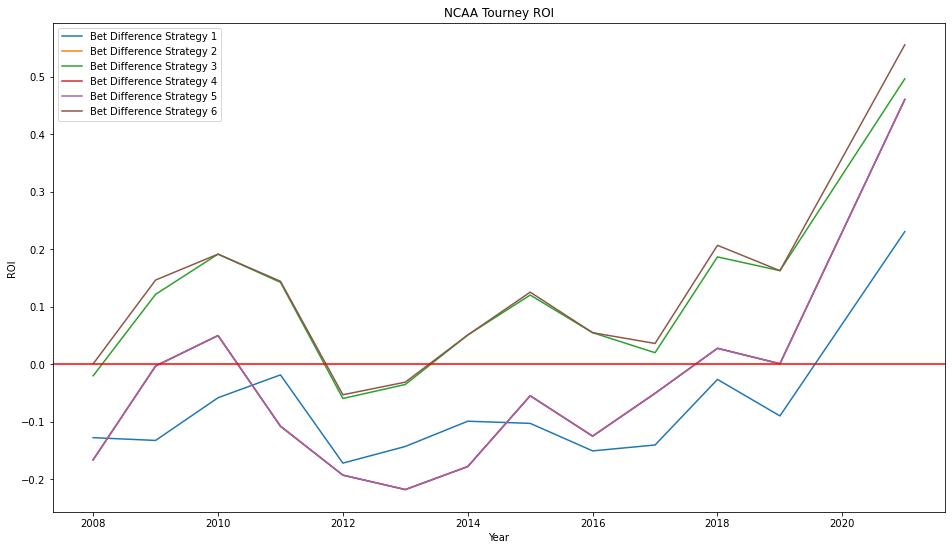

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))

plt.plot(list_of_years1, difference_tracker_strategy1 , label = "Bet Difference Strategy 1")
plt.plot(list_of_years2, difference_tracker_strategy2 , label = "Bet Difference Strategy 2")
plt.plot(list_of_years3, difference_tracker_strategy3 , label = "Bet Difference Strategy 3")
plt.plot(list_of_years4, difference_tracker_strategy4 , label = "Bet Difference Strategy 4")
plt.plot(list_of_years5, difference_tracker_strategy5 , label = "Bet Difference Strategy 5")
plt.plot(list_of_years6, difference_tracker_strategy6 , label = "Bet Difference Strategy 6")
plt.axhline(y = 0.00, color = 'r', linestyle = '-')
plt.title("NCAA Tourney ROI")
plt.xlabel("Year")
plt.ylabel("ROI")
plt.legend()
plt.show()

In [42]:
print("Average ROI over the years per strategy")
print("Strategy 1: ", np.mean(difference_tracker_strategy1))
print("Strategy 2: ", np.mean(difference_tracker_strategy2))
print("Strategy 3: ", np.mean(difference_tracker_strategy3))
print("Strategy 4: ", np.mean(difference_tracker_strategy4))
print("Strategy 5: ", np.mean(difference_tracker_strategy5))
print("Strategy 6: ", np.mean(difference_tracker_strategy6))

Average ROI over the years per strategy
Strategy 1:  -0.07957340215827688
Strategy 2:  -0.0431684719567383
Strategy 3:  0.109885607944317
Strategy 4:  -0.0431684719567383
Strategy 5:  -0.0431684719567383
Strategy 6:  0.1220798594711606


### Data Visualization: Betting Accuracy

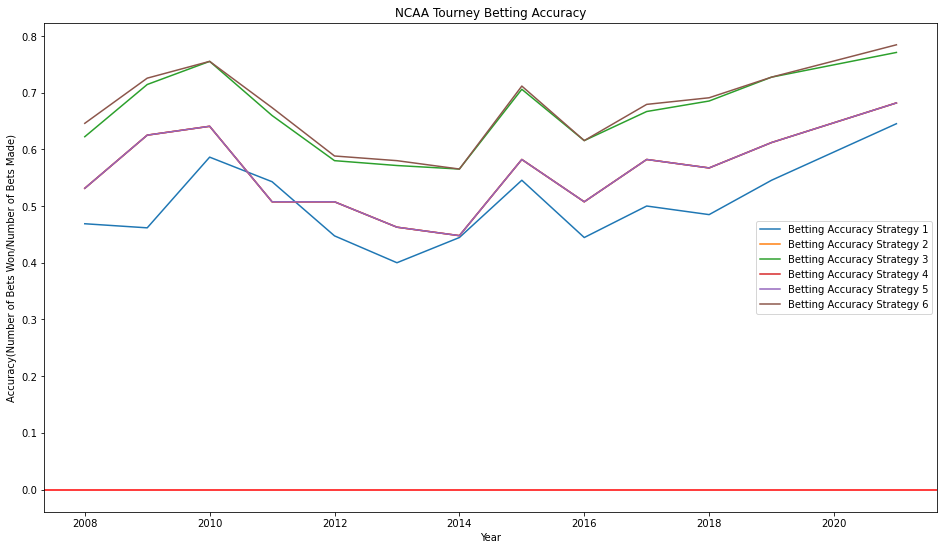

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))

plt.plot(list_of_years1, accuracy_win_bet_strategy1 , label = "Betting Accuracy Strategy 1")
plt.plot(list_of_years2, accuracy_win_bet_strategy2 , label = "Betting Accuracy Strategy 2")
plt.plot(list_of_years3, accuracy_win_bet_strategy3 , label = "Betting Accuracy Strategy 3")
plt.plot(list_of_years4, accuracy_win_bet_strategy4 , label = "Betting Accuracy Strategy 4")
plt.plot(list_of_years5, accuracy_win_bet_strategy5 , label = "Betting Accuracy Strategy 5")
plt.plot(list_of_years6, accuracy_win_bet_strategy6 , label = "Betting Accuracy Strategy 6")
plt.axhline(y = 0.00, color = 'r', linestyle = '-')
plt.title("NCAA Tourney Betting Accuracy")
plt.xlabel("Year")
plt.ylabel("Accuracy(Number of Bets Won/Number of Bets Made)")
plt.legend()
plt.show()

In [44]:
print("Average Betting Accuracy over the years per strategy")
print("Strategy 1: ", np.mean(accuracy_win_bet_strategy1))
print("Strategy 2: ", np.mean(accuracy_win_bet_strategy2))
print("Strategy 3: ", np.mean(accuracy_win_bet_strategy3))
print("Strategy 4: ", np.mean(accuracy_win_bet_strategy4))
print("Strategy 5: ", np.mean(accuracy_win_bet_strategy5))
print("Strategy 6: ", np.mean(accuracy_win_bet_strategy6))

Average Betting Accuracy over the years per strategy
Strategy 1:  0.5012714366899235
Strategy 2:  0.5580625065233275
Strategy 3:  0.6645427145327687
Strategy 4:  0.5580625065233275
Strategy 5:  0.5580625065233275
Strategy 6:  0.6724624266937804


Strategy 6 has the greatest accuracy and ROI. You take a bet when the difference between a team matchup is less than the 25th percentile of the differences among all teams and greater than teh mean of the differences among all teams.


The following are all great markers of a when to place a bet
- 25th percentile of the four factor score differences
- Mean of the four factor score differences
- Median of the four factor score differences

# Four Factors Model Using RUNNING AVERAGE on all Regular Season + NCAA Data to Place Bets on NCAA Tourney Data

## Loading and Merging Data

In [3]:
moneyline_df = pd.read_csv("../data/Pre-Processed-Data/CleanedMoneylineData.csv",index_col=0)
tourney_data = pd.read_csv("../data//Kaggle-Data/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv")

In [4]:
tourney_stats_batch1 = tourney_data[['Season', 'DayNum', 'WTeamID', 'WScore', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']].copy()
tourney_stats_batch1.columns = ['Season', 'DayNum', 'TeamID', 'Score', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF']
tourney_stats_batch2 = tourney_data[['Season', 'DayNum', 'LTeamID', 'LScore', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']].copy()
tourney_stats_batch2.columns = ['Season', 'DayNum', 'TeamID', 'Score', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF'] 
tourney_team_stats = pd.merge(tourney_stats_batch1, tourney_stats_batch2, how='outer')

In [5]:
regular_team_stats = pd.read_csv("..//data/CleanedTeamResults.csv")
regular_team_stats = regular_team_stats.drop(columns=['Unnamed: 0'])

In [6]:
ALL_games = pd.merge(regular_team_stats, tourney_team_stats, how='outer')

In [7]:
box_scores_test = pd.read_csv("../data//Kaggle-Data/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv")
box_scores_test = box_scores_test[box_scores_test['Season'] >= 2008]
box_scores_test = box_scores_test[["Season", "DayNum", "WTeamID", "LTeamID"]]

winner_moneylines_tourney = pd.merge(box_scores_test, moneyline_df, how='left', 
                             left_on=['Season','DayNum','WTeamID'], 
                             right_on = ['Season','DayNum','TeamID'])[["Season", "DayNum", "WTeamID", "LTeamID","Moneyline",]]

winner_moneylines_tourney.rename(columns = {"Moneyline": "AMoneyline"}, inplace = True)

testing_set = pd.merge(winner_moneylines_tourney, moneyline_df, how='left', 
                             left_on=['Season','DayNum','LTeamID'], 
                             right_on = ['Season','DayNum','TeamID'])[["Season", "DayNum", "WTeamID", "LTeamID","AMoneyline","Moneyline"]]

testing_set.rename(columns = {"Moneyline": "BMoneyline", "WTeamID": "A", "LTeamID": "B"}, inplace = True)

testing_set.head()

,Season,DayNum,A,B,AMoneyline,BMoneyline
0,2008,134,1291,1164,-375.0,315.0
1,2008,136,1181,1125,-4500.0,2250.0
2,2008,136,1242,1340,-5000.0,2500.0
3,2008,136,1243,1425,140.0,-160.0
4,2008,136,1266,1246,-275.0,235.0


## Method Implementation for Running Average Model

In [8]:
def running_avg_stats(df, season, daynum, teamA_ID, teamB_ID):
    running_data = df[df['Season'] <= season]
    
    teamA = running_data[running_data['TeamID'] == teamA_ID]
    teamA = teamA[teamA['DayNum'] < daynum]
    teamA = teamA.describe().loc['mean']
    
    teamB = running_data[running_data['TeamID'] == teamB_ID]
    teamB = teamB[teamB['DayNum'] < daynum]
    teamB = teamB.describe().loc['mean']
    
    # Adding in the current matchup four factor scores
    
    # Effective Field Goal Percentage
    # FGM + (0.5 * FGM3) / FGA
    teamA['EFGP'] = (teamA['FGM'] + (0.5 * teamA['FGM3'])) / teamA['FGA']
    teamB['EFGP'] = (teamB['FGM'] + (0.5 * teamB['FGM3'])) / teamB['FGA']
    
    #Turnover Percentage
    #TO / (FGA + (0.44 * FTA) + TO)
    teamA['TP'] = teamA['TO'] / (teamA['FGA'] + (0.44 * teamA['FTA']) + teamA['TO'])
    teamB['TP'] = teamB['TO'] / (teamB['FGA'] + (0.44 * teamB['FTA']) + teamB['TO'])
    
    # Offensive Rebound Percentage
    # OR / OR + OpposingTeam_DR
    teamA['ORP'] = teamA['OR'] / (teamA['OR']  + teamB['DR'])
    teamB['ORP'] = teamB['OR'] / (teamB['OR']  + teamA['DR'])
    
    # Free Throw Rate
    # FTM / FGA
    teamA['FTR'] = teamA['FTM'] / teamA['FGA']
    teamB['FTR'] = teamB['FTM'] / teamB['FGA']
    
    #Four Factor Score
    teamA['4Factor'] = (0.4 * teamA['EFGP']) - (0.25 * teamA['TP']) + (0.2 * teamA['ORP']) + (0.15 * teamA['FTR'])
    teamB['4Factor'] = (0.4 * teamB['EFGP']) - (0.25 * teamB['TP']) + (0.2 * teamB['ORP']) + (0.15 * teamB['FTR'])
    
    return teamA, teamB

In [9]:
def calc_net_payout(moneyline, amount_bet = 1):
    if moneyline < 0:
        return -amount_bet*(100/moneyline)
    else:
        return amount_bet*(moneyline/100)

In [10]:
def bet_difference_avg(df, lower_bound, upper_bound):
    initial_investment = len(df.index) # 1 unit for every game
    running_balance = initial_investment
    bet_count = 0
    lost_count = 0
    won_count = 0
    no_bet_count = 0
    for idx, row in df.iterrows():
        A, B =  running_avg_stats(ALL_games, row['Season'], row['DayNum'], row['A'], row['B'])
        difference = A['4Factor'] - B['4Factor']
        # print(difference)
        if(difference >= upper_bound): #make a bet
            bet_count +=1
            if(difference >= 0): #bet team A
                running_balance += calc_net_payout(row["AMoneyline"])
                won_count +=1
                # print("U bet A")
            else: #bet team B
                running_balance -= 1
                lost_count += 1
        elif(difference < lower_bound): #make a bet
            bet_count +=1
            if(difference >= 0 ): #bet team A
                running_balance += calc_net_payout(row["AMoneyline"])
                won_count +=1
                # print("L bet A")
            else: # bet team B
                running_balance -= 1
                lost_count += 1
        else: # did not make bet
            running_balance = running_balance
            no_bet_count += 1 

    bet_difference_ROI = (running_balance - initial_investment)/initial_investment 
    
    return bet_difference_ROI, bet_count, won_count, lost_count, no_bet_count

## Placing Bets Running Averages Model, Testing the Model on NCAA March Madness Tourney

Differences of Rolling Averages 5-Number Summary

- min = -0.0447214
- Q1 = -0.0056242
- median = 0.00546936
- mean = 0.00572047
- Q3 = 0.01650407
- max = 0.06951614

### Strategy 1: Leveraging the 5-Number Summary to make bets, do not bet within the IQR

In [11]:
list_of_years = np.unique(testing_set["Season"])
RA_strategy1  = []
RA_accuracy_win_bet_strategy1 = []
RA_inaccuracy_lost_bet_strategy1  = []

for year in list_of_years:
    year_df1 = testing_set[testing_set["Season"] == year]
    RAmodel1 = bet_difference_avg(year_df1, -0.0056242, 0.01650407)
    RA_strategy1.append(RAmodel1[0])
    if(RAmodel1[1]>0):
        RA_accuracy_win_bet_strategy1.append(RAmodel1[2]/RAmodel1[1])
        RA_inaccuracy_lost_bet_strategy1.append(RAmodel1[3]/RAmodel1[1])
    else:
        RA_accuracy_win_bet_strategy1.append(0)
        RA_inaccuracy_lost_bet_strategy1.append(0)

### Strategy 2: A bet must be placed leveraging the median as the split

In [12]:
RA_strategy2  = []
RA_accuracy_win_bet_strategy2 = []
RA_inaccuracy_lost_bet_strategy2  = []

for year in list_of_years:
    year_df2 = testing_set[testing_set["Season"] == year]
    RAmodel2 = bet_difference_avg(year_df2, 0.00546936, 0.00546936)
    RA_strategy2.append(RAmodel2[0])
    if(RAmodel2[1]>0):
        RA_accuracy_win_bet_strategy2.append(RAmodel2[2]/RAmodel2[1])
        RA_inaccuracy_lost_bet_strategy2.append(RAmodel2[3]/RAmodel2[1])
    else:
        RA_accuracy_win_bet_strategy2.append(0)
        RA_inaccuracy_lost_bet_strategy2.append(0)

### Strategy 3: Bet when the difference is greater than the 50th percentile of differences and less than the 25th percentile of differences. no bets in the middle 25th to 50th percentile

In [13]:
RA_strategy3  = []
RA_accuracy_win_bet_strategy3 = []
RA_inaccuracy_lost_bet_strategy3  = []

for year in list_of_years:
    year_df3 = testing_set[testing_set["Season"] == year]
    RAmodel3 = bet_difference_avg(year_df3, -0.0056242, 0.00573047)
    RA_strategy3.append(RAmodel3[0])
    if(RAmodel3[1]>0):
        RA_accuracy_win_bet_strategy3.append(RAmodel3[2]/RAmodel3[1])
        RA_inaccuracy_lost_bet_strategy3.append(RAmodel3[3]/RAmodel3[1])
    else:
        RA_accuracy_win_bet_strategy3.append(0)
        RA_inaccuracy_lost_bet_strategy3.append(0)

### Strategy 4: A bet must be placed leveraging the 25th percentile difference as the split

In [14]:
RA_strategy4  = []
RA_accuracy_win_bet_strategy4 = []
RA_inaccuracy_lost_bet_strategy4  = []

for year in list_of_years:
    year_df4 = testing_set[testing_set["Season"] == year]
    RAmodel4 = bet_difference_avg(year_df4, -0.0056242, -0.0056242)
    RA_strategy4.append(RAmodel4[0])
    if(RAmodel4[1]>0):
        RA_accuracy_win_bet_strategy4.append(RAmodel4[2]/RAmodel4[1])
        RA_inaccuracy_lost_bet_strategy4.append(RAmodel4[3]/RAmodel4[1])
    else:
        RA_accuracy_win_bet_strategy4.append(0)
        RA_inaccuracy_lost_bet_strategy4.append(0)

### Strategy 5: A bet must be placed leveraging the mean difference as the split

In [ ]:
RA_strategy5 = []
RA_accuracy_win_bet_strategy5 = []
RA_inaccuracy_lost_bet_strategy5 = []

for year in list_of_years:
    year_df5 = testing_set[testing_set["Season"] == year]
    RAmodel5 = bet_difference_avg(year_df5, 0.00572047, 0.00572047)
    RA_strategy5.append(RAmodel5[0])
    if(RAmodel5[1]>0):
        RA_accuracy_win_bet_strategy5.append(RAmodel5[2]/RAmodel5[1])
        RA_inaccuracy_lost_bet_strategy5.append(RAmodel5[3]/RAmodel5[1])
    else:
        RA_accuracy_win_bet_strategy5.append(0)
        RA_inaccuracy_lost_bet_strategy5.append(0)

### Strategy 6 Running Averages: Bet when the difference is greater than the mean of differences and less than the 25th percentile of differences. no bets in the middle 25th to mean percentiles

In [22]:
RA_strategy6  = []
RA_accuracy_win_bet_strategy6 = []
RA_inaccuracy_lost_bet_strategy6  = []

for year in list_of_years:
    year_df6 = testing_set[testing_set["Season"] == year]
    RAmodel6 = bet_difference_avg(year_df6, -0.0056242, 0.00572047)
    RA_strategy6.append(RAmodel6[0])
    if(RAmodel6[1]>0):
        RA_accuracy_win_bet_strategy6.append(RAmodel6[2]/RAmodel6[1])
        RA_inaccuracy_lost_bet_strategy6.append(RAmodel6[3]/RAmodel6[1])
    else:
        RA_accuracy_win_bet_strategy6.append(0)
        RA_inaccuracy_lost_bet_strategy6.append(0)

## Data Visualization: ROI and Betting Accuracy Based on Strategy to Place Bets with Running Averages Model

### Data Visualization: ROI

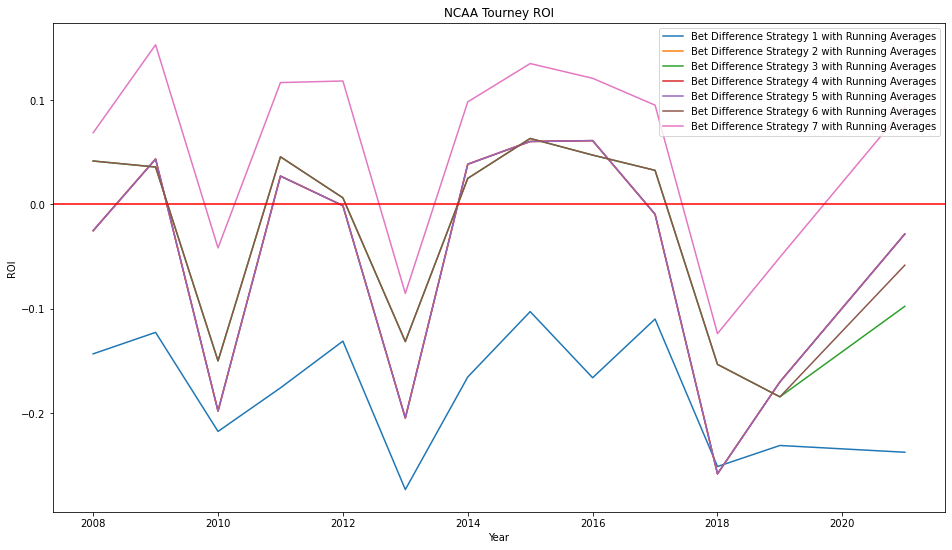

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))

plt.plot(list_of_years, RA_strategy1 , label = "Bet Difference Strategy 1 with Running Averages")
plt.plot(list_of_years, RA_strategy2 , label = "Bet Difference Strategy 2 with Running Averages")
plt.plot(list_of_years, RA_strategy3 , label = "Bet Difference Strategy 3 with Running Averages")
plt.plot(list_of_years, RA_strategy4 , label = "Bet Difference Strategy 4 with Running Averages")
plt.plot(list_of_years, RA_strategy5 , label = "Bet Difference Strategy 5 with Running Averages")
plt.plot(list_of_years, RA_strategy6 , label = "Bet Difference Strategy 6 with Running Averages")
plt.axhline(y = 0.00, color = 'r', linestyle = '-')
plt.title("NCAA Tourney ROI")
plt.xlabel("Year")
plt.ylabel("ROI")
plt.legend()
plt.show()

In [34]:
print("Average ROI over the years per strategy")
print("Strategy 1: ", np.mean(RA_strategy1))
print("Strategy 2: ", np.mean(RA_strategy2))
print("Strategy 3: ", np.mean(RA_strategy3))
print("Strategy 4: ", np.mean(RA_strategy4))
print("Strategy 5: ", np.mean(RA_strategy5))
print("Strategy 6: ", np.mean(RA_strategy6))

Average ROI over the years per strategy
Strategy 1:  -0.1790494805393163
Strategy 2:  -0.051222204832937504
Strategy 3:  -0.03237352434625165
Strategy 4:  -0.051222204832937504
Strategy 5:  -0.051222204832937504
Strategy 6:  -0.029343221315948617
Strategy 7:  0.05348426717763902


### Data Visualization: Accuracy

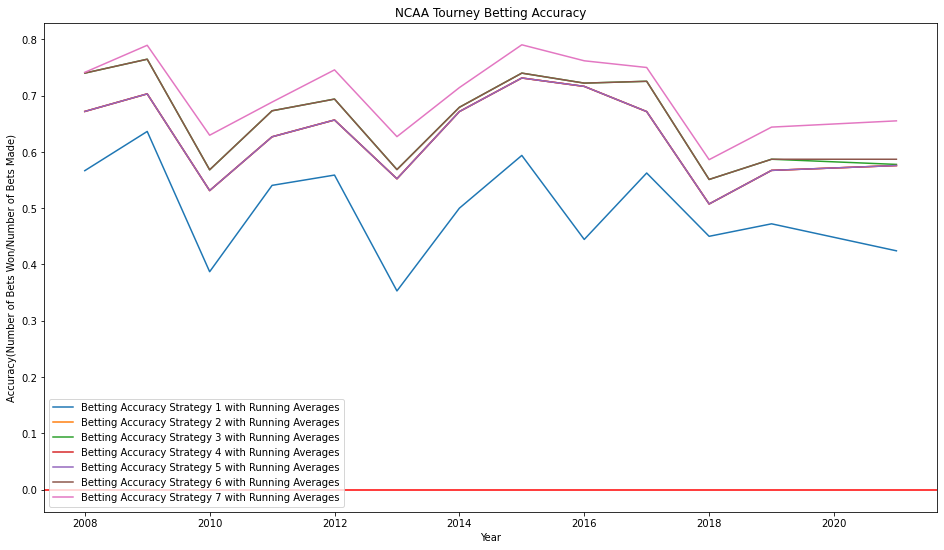

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))

plt.plot(list_of_years, RA_accuracy_win_bet_strategy1 , label = "Betting Accuracy Strategy 1 with Running Averages")
plt.plot(list_of_years, RA_accuracy_win_bet_strategy2 , label = "Betting Accuracy Strategy 2 with Running Averages")
plt.plot(list_of_years, RA_accuracy_win_bet_strategy3 , label = "Betting Accuracy Strategy 3 with Running Averages")
plt.plot(list_of_years, RA_accuracy_win_bet_strategy4 , label = "Betting Accuracy Strategy 4 with Running Averages")
plt.plot(list_of_years, RA_accuracy_win_bet_strategy5 , label = "Betting Accuracy Strategy 5 with Running Averages")
plt.plot(list_of_years, RA_accuracy_win_bet_strategy6 , label = "Betting Accuracy Strategy 6 with Running Averages")
plt.axhline(y = 0.00, color = 'r', linestyle = '-')
plt.title("NCAA Tourney Betting Accuracy")
plt.xlabel("Year")
plt.ylabel("Accuracy(Number of Bets Won/Number of Bets Made)")
plt.legend()
plt.show()

In [35]:
print("Average Betting Accuracy over the years per strategy")
print("Strategy 1: ", np.mean(RA_accuracy_win_bet_strategy1))
print("Strategy 2: ", np.mean(RA_accuracy_win_bet_strategy2))
print("Strategy 3: ", np.mean(RA_accuracy_win_bet_strategy3))
print("Strategy 4: ", np.mean(RA_accuracy_win_bet_strategy4))
print("Strategy 5: ", np.mean(RA_accuracy_win_bet_strategy5))
print("Strategy 6: ", np.mean(RA_accuracy_win_bet_strategy6))

Average Betting Accuracy over the years per strategy
Strategy 1:  0.49919933958121815
Strategy 2:  0.62950000869777
Strategy 3:  0.6608601565086291
Strategy 4:  0.62950000869777
Strategy 5:  0.62950000869777
Strategy 6:  0.6615662137364254
Strategy 7:  0.7018345180055197


# Four Factors Model Using RUNNING AVERAGE on Season-Specific Regular Season + NCAA Data to Place Bets on NCAA Tourney Data

## Loading and Merging Data

In [17]:
testing_set.head()

,Season,DayNum,A,B,AMoneyline,BMoneyline
0,2008,134,1291,1164,-375.0,315.0
1,2008,136,1181,1125,-4500.0,2250.0
2,2008,136,1242,1340,-5000.0,2500.0
3,2008,136,1243,1425,140.0,-160.0
4,2008,136,1266,1246,-275.0,235.0


## Method Implementation for Running Average Model with Only Season Data

In [18]:
def running_avg_stats_season(df, season, daynum, teamA_ID, teamB_ID):
    running_data = df[df['Season'] == season]
    
    teamA = running_data[running_data['TeamID'] == teamA_ID]
    teamA = teamA[teamA['DayNum'] < daynum]
    teamA = teamA.describe().loc['mean']
    
    teamB = running_data[running_data['TeamID'] == teamB_ID]
    teamB = teamB[teamB['DayNum'] < daynum]
    teamB = teamB.describe().loc['mean']
    
    # Adding in the current matchup four factor scores
    
    # Effective Field Goal Percentage
    # FGM + (0.5 * FGM3) / FGA
    teamA['EFGP'] = (teamA['FGM'] + (0.5 * teamA['FGM3'])) / teamA['FGA']
    teamB['EFGP'] = (teamB['FGM'] + (0.5 * teamB['FGM3'])) / teamB['FGA']
    
    #Turnover Percentage
    #TO / (FGA + (0.44 * FTA) + TO)
    teamA['TP'] = teamA['TO'] / (teamA['FGA'] + (0.44 * teamA['FTA']) + teamA['TO'])
    teamB['TP'] = teamB['TO'] / (teamB['FGA'] + (0.44 * teamB['FTA']) + teamB['TO'])
    
    # Offensive Rebound Percentage
    # OR / OR + OpposingTeam_DR
    teamA['ORP'] = teamA['OR'] / (teamA['OR']  + teamB['DR'])
    teamB['ORP'] = teamB['OR'] / (teamB['OR']  + teamA['DR'])
    
    # Free Throw Rate
    # FTM / FGA
    teamA['FTR'] = teamA['FTM'] / teamA['FGA']
    teamB['FTR'] = teamB['FTM'] / teamB['FGA']
    
    #Four Factor Score
    teamA['4Factor'] = (0.4 * teamA['EFGP']) - (0.25 * teamA['TP']) + (0.2 * teamA['ORP']) + (0.15 * teamA['FTR'])
    teamB['4Factor'] = (0.4 * teamB['EFGP']) - (0.25 * teamB['TP']) + (0.2 * teamB['ORP']) + (0.15 * teamB['FTR'])
    
    return teamA, teamB

In [32]:
def bet_difference_avg_season(df, lower_bound, upper_bound):
    initial_investment = len(df.index) # 1 unit for every game
    running_balance = initial_investment
    bet_count = 0
    lost_count = 0
    won_count = 0
    no_bet_count = 0
    for idx, row in df.iterrows():
        A, B =  running_avg_stats_season(ALL_games, row['Season'], row['DayNum'], row['A'], row['B'])
        difference = A['4Factor'] - B['4Factor']
        # print(difference)
        if(difference >= upper_bound): #make a bet
            bet_count +=1
            if(difference >= 0): #bet team A
                running_balance += calc_net_payout(row["AMoneyline"])
                won_count +=1
                # print("U bet A")
            else: #bet team B
                running_balance -= 1
                lost_count += 1
        elif(difference < lower_bound): #make a bet
            bet_count +=1
            if(difference >= 0 ): #bet team A
                running_balance += calc_net_payout(row["AMoneyline"])
                won_count +=1
                # print("L bet A")
            else: # bet team B
                running_balance -= 1
                lost_count += 1
        else: # did not make bet
            running_balance = running_balance
            no_bet_count += 1 

    bet_difference_ROI = (running_balance - initial_investment)/initial_investment 
    
    return bet_difference_ROI, bet_count, won_count, lost_count, no_bet_count

## Placing Bets Running Averages Model, Testing the Model on NCAA March Madness Tourney

Differences of Rolling Averages 5-Number Summary

- min = -0.049773
- Q1 = -0.0073457
- median = 0.0042096
- mean = 0.00518393
- Q3 = 0.01644478
- max = 0.05440531

### Strategy 1: Leveraging the 5-Number Summary to make bets, do not bet within the IQR

In [33]:
list_of_years = np.unique(testing_set["Season"])
SRA_strategy1  = []
SRA_accuracy_win_bet_strategy1 = []
SRA_inaccuracy_lost_bet_strategy1  = []

for year in list_of_years:
    year_df1 = testing_set[testing_set["Season"] == year]
    RAmodel1 = bet_difference_avg_season(year_df1, -0.0073457, 0.01644478)
    SRA_strategy1.append(RAmodel1[0])
    if(RAmodel1[1]>0):
        SRA_accuracy_win_bet_strategy1.append(RAmodel1[2]/RAmodel1[1])
        SRA_inaccuracy_lost_bet_strategy1.append(RAmodel1[3]/RAmodel1[1])
    else:
        SRA_accuracy_win_bet_strategy1.append(0)
        SRA_inaccuracy_lost_bet_strategy1.append(0)

### Strategy 2: A bet must be placed leveraging the median as the split

In [34]:
SRA_strategy2  = []
SRA_accuracy_win_bet_strategy2 = []
SRA_inaccuracy_lost_bet_strategy2  = []

for year in list_of_years:
    year_df2 = testing_set[testing_set["Season"] == year]
    RAmodel2 = bet_difference_avg(year_df2, 0.0042096, 0.0042096)
    SRA_strategy2.append(RAmodel2[0])
    if(RAmodel2[1]>0):
        SRA_accuracy_win_bet_strategy2.append(RAmodel2[2]/RAmodel2[1])
        SRA_inaccuracy_lost_bet_strategy2.append(RAmodel2[3]/RAmodel2[1])
    else:
        SRA_accuracy_win_bet_strategy2.append(0)
        SRA_inaccuracy_lost_bet_strategy2.append(0)

### Strategy 3: Bet when the difference is greater than the 50th percentile of differences and less than the 25th percentile of differences. no bets in the middle 25th to 50th percentile

In [35]:
SRA_strategy3  = []
SRA_accuracy_win_bet_strategy3 = []
SRA_inaccuracy_lost_bet_strategy3  = []

for year in list_of_years:
    year_df3 = testing_set[testing_set["Season"] == year]
    RAmodel3 = bet_difference_avg(year_df3, -0.0073457,0.0042096)
    SRA_strategy3.append(RAmodel3[0])
    if(RAmodel3[1]>0):
        SRA_accuracy_win_bet_strategy3.append(RAmodel3[2]/RAmodel3[1])
        SRA_inaccuracy_lost_bet_strategy3.append(RAmodel3[3]/RAmodel3[1])
    else:
        SRA_accuracy_win_bet_strategy3.append(0)
        SRA_inaccuracy_lost_bet_strategy3.append(0)

### Strategy 4: A bet must be placed leveraging the 25th percentile difference as the split

In [36]:
SRA_strategy4  = []
SRA_accuracy_win_bet_strategy4 = []
SRA_inaccuracy_lost_bet_strategy4  = []

for year in list_of_years:
    year_df4 = testing_set[testing_set["Season"] == year]
    RAmodel4 = bet_difference_avg(year_df4, -0.0073457, -0.0073457)
    SRA_strategy4.append(RAmodel4[0])
    if(RAmodel4[1]>0):
        SRA_accuracy_win_bet_strategy4.append(RAmodel4[2]/RAmodel4[1])
        SRA_inaccuracy_lost_bet_strategy4.append(RAmodel4[3]/RAmodel4[1])
    else:
        SRA_accuracy_win_bet_strategy4.append(0)
        SRA_inaccuracy_lost_bet_strategy4.append(0)

### Strategy 5: A bet must be placed leveraging the mean difference as the split

In [37]:
SRA_strategy5 = []
SRA_accuracy_win_bet_strategy5 = []
SRA_inaccuracy_lost_bet_strategy5 = []

for year in list_of_years:
    year_df5 = testing_set[testing_set["Season"] == year]
    RAmodel5 = bet_difference_avg(year_df5, 0.00518393, 0.00518393)
    SRA_strategy5.append(RAmodel5[0])
    if(RAmodel5[1]>0):
        SRA_accuracy_win_bet_strategy5.append(RAmodel5[2]/RAmodel5[1])
        SRA_inaccuracy_lost_bet_strategy5.append(RAmodel5[3]/RAmodel5[1])
    else:
        SRA_accuracy_win_bet_strategy5.append(0)
        SRA_inaccuracy_lost_bet_strategy5.append(0)

### Strategy 6 Running Averages: Bet when the difference is greater than the mean of differences and less than the 25th percentile of differences. no bets in the middle 25th to mean percentiles

In [38]:
SRA_strategy6  = []
SRA_accuracy_win_bet_strategy6 = []
SRA_inaccuracy_lost_bet_strategy6  = []

for year in list_of_years:
    year_df6 = testing_set[testing_set["Season"] == year]
    RAmodel6 = bet_difference_avg(year_df6, -0.0073457, 0.00518393)
    SRA_strategy6.append(RAmodel6[0])
    if(RAmodel6[1]>0):
        SRA_accuracy_win_bet_strategy6.append(RAmodel6[2]/RAmodel6[1])
        SRA_inaccuracy_lost_bet_strategy6.append(RAmodel6[3]/RAmodel6[1])
    else:
        SRA_accuracy_win_bet_strategy6.append(0)
        SRA_inaccuracy_lost_bet_strategy6.append(0)

## Data Visualization: ROI and Betting Accuracy Based on Strategy to Place Bets with Running Averages Model

### Data Visualization: ROI

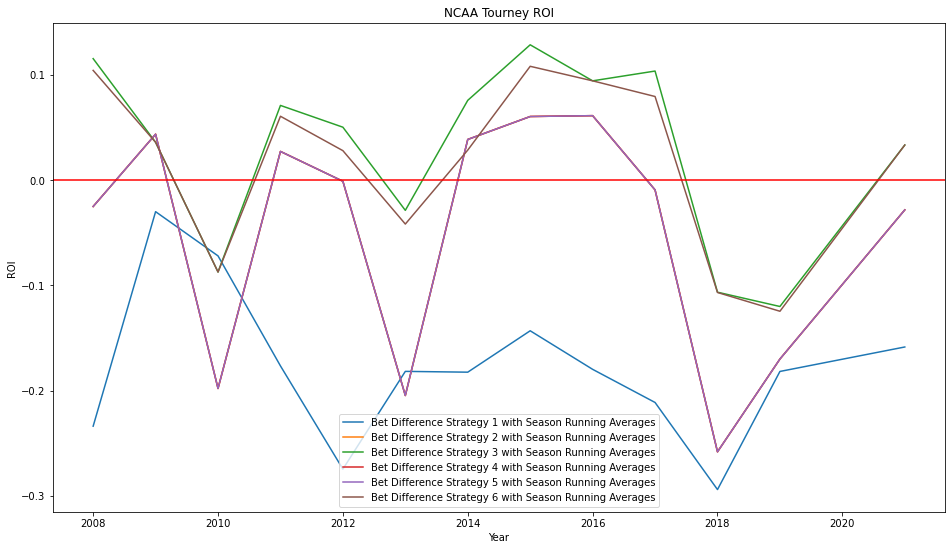

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))

plt.plot(list_of_years, SRA_strategy1 , label = "Bet Difference Strategy 1 with Season Running Averages")
plt.plot(list_of_years, SRA_strategy2 , label = "Bet Difference Strategy 2 with Season Running Averages")
plt.plot(list_of_years, SRA_strategy3 , label = "Bet Difference Strategy 3 with Season Running Averages")
plt.plot(list_of_years, SRA_strategy4 , label = "Bet Difference Strategy 4 with Season Running Averages")
plt.plot(list_of_years, SRA_strategy5 , label = "Bet Difference Strategy 5 with Season Running Averages")
plt.plot(list_of_years, SRA_strategy6 , label = "Bet Difference Strategy 6 with Season Running Averages")
plt.axhline(y = 0.00, color = 'r', linestyle = '-')
plt.title("NCAA Tourney ROI")
plt.xlabel("Year")
plt.ylabel("ROI")
plt.legend()
plt.show()

In [40]:
print("Average ROI over the years per strategy")
print("Strategy 1: ", np.mean(SRA_strategy1))
print("Strategy 2: ", np.mean(SRA_strategy2))
print("Strategy 3: ", np.mean(SRA_strategy3))
print("Strategy 4: ", np.mean(SRA_strategy4))
print("Strategy 5: ", np.mean(SRA_strategy5))
print("Strategy 6: ", np.mean(SRA_strategy6))

Average ROI over the years per strategy
Strategy 1:  -0.17853403772168813
Strategy 2:  -0.051222204832937504
Strategy 3:  0.027867990764023576
Strategy 4:  -0.051222204832937504
Strategy 5:  -0.051222204832937504
Strategy 6:  0.01607261054027984


### Data Visualization: Accuracy

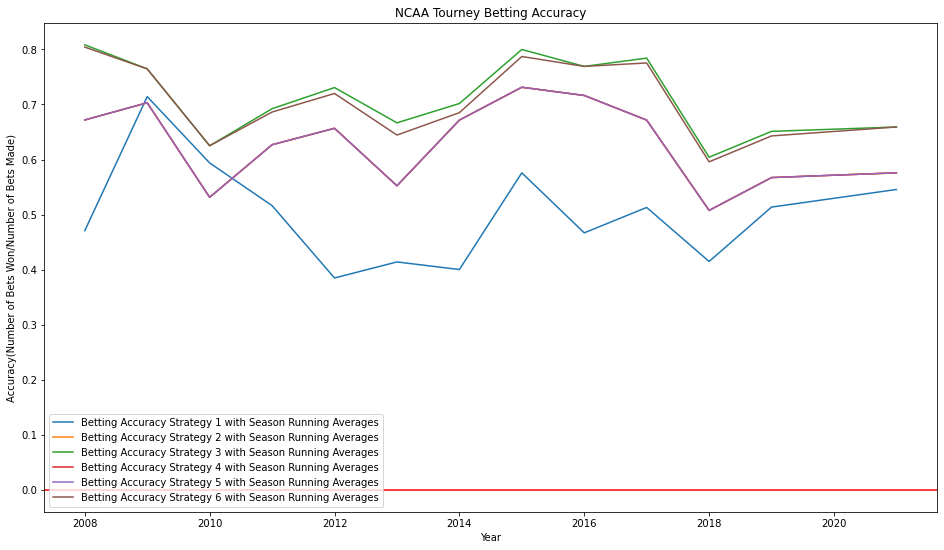

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))

plt.plot(list_of_years, SRA_accuracy_win_bet_strategy1 , label = "Betting Accuracy Strategy 1 with Season Running Averages")
plt.plot(list_of_years, SRA_accuracy_win_bet_strategy2 , label = "Betting Accuracy Strategy 2 with Season Running Averages")
plt.plot(list_of_years, SRA_accuracy_win_bet_strategy3 , label = "Betting Accuracy Strategy 3 with Season Running Averages")
plt.plot(list_of_years, SRA_accuracy_win_bet_strategy4 , label = "Betting Accuracy Strategy 4 with Season Running Averages")
plt.plot(list_of_years, SRA_accuracy_win_bet_strategy5 , label = "Betting Accuracy Strategy 5 with Season Running Averages")
plt.plot(list_of_years, SRA_accuracy_win_bet_strategy6 , label = "Betting Accuracy Strategy 6 with Season Running Averages")
plt.axhline(y = 0.00, color = 'r', linestyle = '-')
plt.title("NCAA Tourney Betting Accuracy")
plt.xlabel("Year")
plt.ylabel("Accuracy(Number of Bets Won/Number of Bets Made)")
plt.legend()
plt.show()

In [42]:
print("Average Betting Accuracy over the years per strategy")
print("Strategy 1: ", np.mean(SRA_accuracy_win_bet_strategy1))
print("Strategy 2: ", np.mean(SRA_accuracy_win_bet_strategy2))
print("Strategy 3: ", np.mean(SRA_accuracy_win_bet_strategy3))
print("Strategy 4: ", np.mean(SRA_accuracy_win_bet_strategy4))
print("Strategy 5: ", np.mean(SRA_accuracy_win_bet_strategy5))
print("Strategy 6: ", np.mean(SRA_accuracy_win_bet_strategy6))

Average Betting Accuracy over the years per strategy
Strategy 1:  0.5016929561889103
Strategy 2:  0.62950000869777
Strategy 3:  0.7121291813488869
Strategy 4:  0.62950000869777
Strategy 5:  0.62950000869777
Strategy 6:  0.704586584349089
